In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
def exponential(x, a, b, c):
    """
    Fit something exponential
    """

    return a + b*np.exp(-c/x)


def chi_squared(data, fit, popt, error):

    chi = np.sum((data-fit)**2/error**2)

    dof = len(data)-len(popt)

    return chi/dof


def fit_func(func, xdata, ydata, yerror, *args):
    """
    Takes the function we are fitting to as an argument
    Returns the fit, error and r² value for the fit
    """
    popt, pcov = curve_fit(func, xdata, ydata, sigma=yerror, p0=args, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))
    chi = chi_squared(ydata, func(xdata, *popt), popt, yerror)

    return popt, pcov, perr, chi

In [3]:
# Data from the runs
# For whatever reason cannot get the notebook to work without flipping the data (works fine on my local python installation)
rates = np.flip(np.array([-69.68237121, -73.35120395, -74.04247526, -74.03116983, -73.36009459, -73.62721715]))
errors = np.flip(np.array([0.09854891, 0.08446138, 0.09682804, 0.11282107, 0.15548551, 0.24394038]))
Nx = np.flip(np.array([24, 28, 34, 40, 48, 60]))
a = 1.5
vols = a*Nx

[-7.38969645e+01  1.05876533e+06  3.45380350e-01]


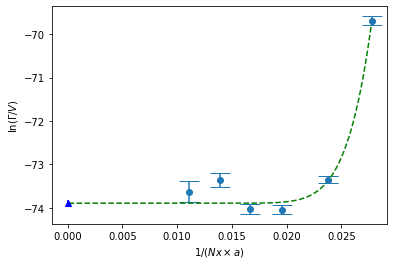

In [10]:
popt_exponential, pcov_exponential, perr_exponential, rsq_exponential = fit_func(exponential, 1/vols, rates, errors, *(-74,10e5,0.3))
xfit = np.linspace(0.0001, 1/min(vols), 1000)

plt.figure(1)
plt.errorbar(1/vols, rates, yerr=errors, marker='o', capsize=10, fmt=" ")
plt.plot(xfit, exponential(xfit, *popt_exponential), color = 'g', linestyle='--',label='Exponential: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_exponential))
plt.errorbar(0, popt_exponential[0], yerr=perr_exponential[0], fmt='^', color ='b')
plt.ylabel(r"$\ln(\Gamma/V)$")
plt.xlabel(r"$1/(Nx\times a)$")
print(popt_exponential)
